# Aviris Methane Mapping
ESE 156 -- Find the methane plume!

In [1]:
## Make sure plots are create inline
%matplotlib inline
## The usual packages (numpy, matplotlib, etc)
from RSE_style import *

import os
import spectral.io.envi as envi


In [8]:
from spectral import *

In [2]:
# Return the header associated with an image file (HDR datasets, all AVIRIS-like)
def find_header(imgfile):
  if os.path.exists(imgfile+'.hdr'):
    return imgfile+'.hdr'
  ind = imgfile.rfind('.raw')
  if ind >= 0:
    return imgfile[0:ind]+'.hdr'
  ind = imgfile.rfind('.img')
  if ind >= 0:
    return imgfile[0:ind]+'.hdr'
  raise IOError('No header found for file {0}'.format(imgfile));

In [3]:
# You can download all files from ftp://fluo.gps.caltech.edu/XYZT_ESE156/Data/AVng/
in_file = '/Volumes/data1/ftp/XYZT_ESE156/Data/AVng//ang20150422t162859_rdn_v1f_clip'
in_hdr = find_header(in_file)
img = envi.open(in_hdr, in_file)
wl = np.loadtxt('/Volumes/data1/ftp/XYZT_ESE156/Data/AVng/ANGv3_spc_rev_300nm_truncated.wav')
# Color indices for R,G and B
index_r = np.argmin(np.abs(wl[:,1]-0.65))
index_g = np.argmin(np.abs(wl[:,1]-0.473))
index_b = np.argmin(np.abs(wl[:,1]-0.532))
#print index_r,index_g,index_b

In [4]:
print(img.shape)
rgb = img[:,:,[index_r,index_g,index_b]]
print(rgb.shape)

(3569, 598, 432)
(3569, 598, 3)


ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [1.1988011598587036, 17.687557220458984]
    G: [1.9732520580291748, 16.197772979736328]
    B: [1.734262228012085, 18.490930557250977]

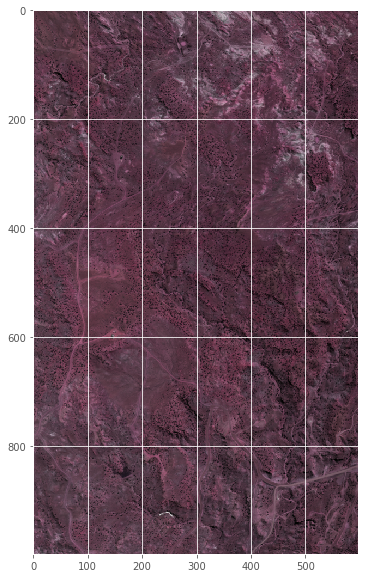

In [12]:
figsize(12,10)
imshow(rgb[1:1000,:,:])

350 408


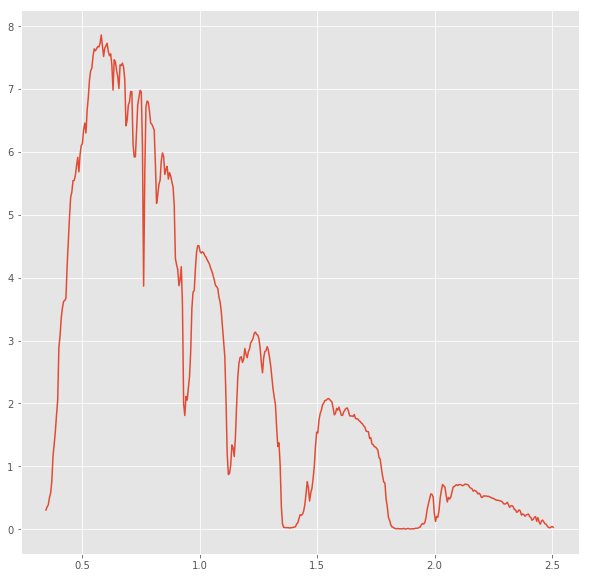

In [82]:
plt.plot(wl[:,1],img[1000,200,:].flatten())
s1 = np.argmin(np.abs(wl[:,1]-2.100))
s2 = np.argmin(np.abs(wl[:,1]-2.390))
print(s1,s2)
#plt.plot(np.arange(s1,s2,1),img[1000,200,s1:s2].flatten())
#plt.plot(np.arange(s1,s2,1),img[1000,200,s1:s2].flatten())
#plt.xlim((360,380))

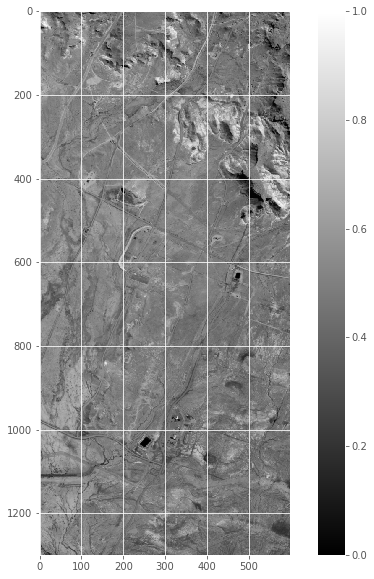

In [86]:
imshow(subset[:,:,367])
plt.colorbar()